In [68]:
%matplotlib inline 
import matplotlib.pylab as plt 
import numpy as np 
import pandas as pd 

import seaborn as sns
sns.set_style('ticks');
current_colors = sns.color_palette()


import sys 
sys.path.append('../code_Boyle/')
import CRISPR_dCas9_binding_curve_Boyle as dCas9
reload(dCas9);




# View the results from the Simulated Annealing Fitting

## load parameters from simulated annealing 

In [84]:
fit = pd.read_csv('../data/26_7_2018/fit_26_7_2018_sim_A.txt',delimiter='\t',index_col=45)
fit = fit.reset_index()

Nparams = 43
final_result = []
for param in range(1,Nparams+1):
    col = 'Parameter ' + str(param)
    final_result.append(fit[col].iloc[-1])

sa_result = np.array(final_result)

## load experimental data for comparison 

In [85]:
on_rate = np.loadtxt(delimiter=',', fname='../Data_Boyle/KoenDataForMisha/3ModelFit/3ModelOnRate.txt')
off_rate = np.loadtxt(delimiter=',', fname='../Data_Boyle/KoenDataForMisha/3ModelFit/3ModelOffRate.txt')
Pbound = np.loadtxt(delimiter=',', fname='../Data_Boyle/KoenDataForMisha/3ModelFit/3ModelOccupancy.txt')

## predict occupation, association rate and dissociation rate 

In [86]:
on_rate_predict = np.zeros([20,20])
off_rate_predict = np.zeros([20,20])
Pbound_predict = np.zeros([20,20])

Pbound_OT,_,_ = dCas9.calc_Boyle(True, True, True,sa_result, [])

for i in range(0,20):
    for j in range(0,20):
        mismatch_positions = [20-i, 20-j]
        if i==j:
            mismatch_positions = [20-i]
        predictions = dCas9.calc_Boyle(True, True, True,sa_result, mismatch_positions)
        Pbound_predict[i,j] = predictions[0]/Pbound_OT
        on_rate_predict[i,j] = predictions[1]
        off_rate_predict[i,j] = predictions[2]

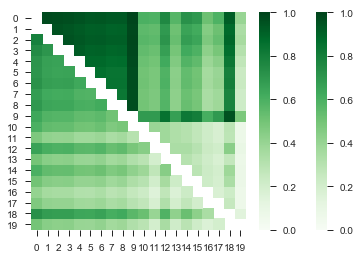

In [87]:
experiment = Pbound

mask = np.zeros(shape=experiment.shape)
for i in range(len(experiment)):
    for j in range(i-1,len(experiment)):
        mask[i,j] = 1
        
axHeatmap=sns.heatmap(experiment, cmap='Greens',mask=mask,cbar=True,vmin=0,vmax=1);
        
    
model = Pbound_predict

mask = np.ones(shape=model.shape)
for i in range(len(model)):
    for j in range(i+1,len(model)):
        mask[i,j] = 0
sns.heatmap(model, cmap='Greens',mask=mask,cbar=True,vmin=0,vmax=1);

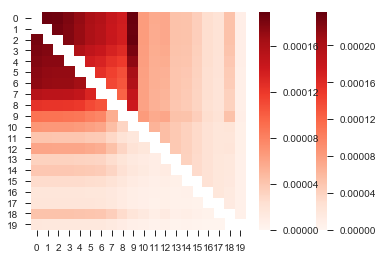

In [88]:
experiment = on_rate

mask = np.zeros(shape=experiment.shape)
for i in range(len(experiment)):
    for j in range(i-1,len(experiment)):
        mask[i,j] = 1
        
axHeatmap=sns.heatmap(experiment, cmap='Reds',mask=mask,cbar=True,vmin=0);
        
    
model = on_rate_predict

mask = np.ones(shape=model.shape)
for i in range(len(model)):
    for j in range(i+1,len(model)):
        mask[i,j] = 0
sns.heatmap(model, cmap='Reds',mask=mask,cbar=True,vmin=0);

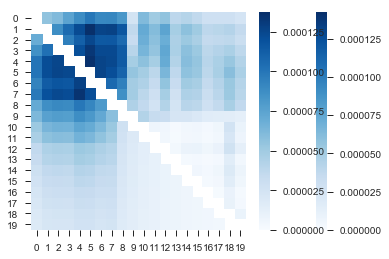

In [89]:
experiment = off_rate

mask = np.zeros(shape=experiment.shape)
for i in range(len(experiment)):
    for j in range(i-1,len(experiment)):
        mask[i,j] = 1
        
axHeatmap=sns.heatmap(experiment, cmap='Blues',mask=mask,cbar=True,vmin=0);
        
    
model = off_rate_predict

mask = np.ones(shape=model.shape)
for i in range(len(model)):
    for j in range(i+1,len(model)):
        mask[i,j] = 0
sns.heatmap(model, cmap='Blues',mask=mask,cbar=True,vmin=0);

<Container object of 20 artists>

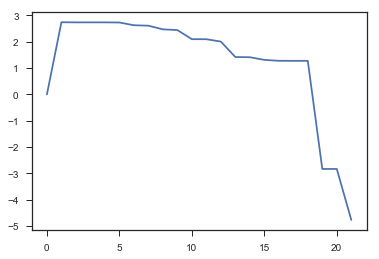

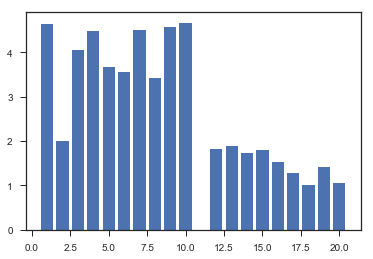

In [106]:
epsilon_C = sa_result[:21]
epsilon_C[1:] *= -1
landscape =[0.0]
for eps in epsilon_C:
    landscape.append(landscape[-1]+eps)
plt.plot(landscape)


plt.figure()
epsilon_I = sa_result[21:-2]
plt.bar([i+1 for i in range(20)],epsilon_I)